# Decision Tree

Decision Tree is the one of the supervised machine learning algorithm.Decision tree can be used for both classification and 
Regression problems, but it is mostly applied in  solving the classification problems.It is a tree-like structure that represents
a series of decisions and their possible consequences classifier,where 
internal nodes represent the features of a dataset, branches represent the decision rules, and each leaf node represent the 
outcome.

Decision nodes are used to make any decision and have multiple branches, whereas Leaf nodes are the output of those decisions 
and do not contain any further branches.
The decisions or the test are perfomed on the basis of features of the given dataset.

The goal of using a Decision Tree is to create a training model that can use to predict the class or value of the target variable 
by learning simple decision rules inferred from priori (training data).

## Decision Tree Types
### i) Categorical Variable Decision
Has a categorical target variable 
### ii) Continous Variable Decision Tree
Has a continous taget variable.
 
# Decision Tree Terminology

### Root Node
The topmost node of a decision tree and  represent the entire population or sample and this further gets divided into two or more sub-nodes
### Splitting
It is a process of dividing a node into two or more sub-nodes
### Decision Node/Internal node
When a sub-node splits into further sub-nodes, then it is called the decision the decision node.
  
### Leaf/Terminal  Node 
Nodes do not split is called Leaf/Terminal node.It is the last node in the decison tree and furthest from the root node.
### Pruning 
When sub-nodes of a decision node are removed.
### Parent and Child Node
A node , which is didived into sub-nodes is called a parent node of sub-nodes whrereas sub-nodes are the child of a parent node.

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OrdinalEncoder,StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

import warnings
warnings.simplefilter("ignore")

# Entropy 

$ {\sum}_{i=1}^C -p(i) {\space}log_{2} {\space}p(i) $

pi is the probability of randomly selecting an example in class i.

p1=49/54

p2=5/54

p3= ...

pn= ....

In [2]:
def entropy(p1,p2,p3):
    e=-(p1*np.log2(p1) + p2 * np.log2(p2))+ p3 * np.log2(p3)
    return e
entropy(49/54,5/54,1)

0.44506485705083865

# Gini Index

$G=\sum_{i=1}^{C} p(i) * (1-p(i))$

C is the total number of classes 

p(i) is the probability of picking the data points with the class i

In [3]:
def GiniIndex(p1,p2):
    gini=p1*(1-p1)+(p2*(1-p2))
    return gini
GiniIndex(0.5,0.5)  

0.5

## Information Gain

$ Gain=E_{parent}−{E}_{children} $

$ IG(T,A) = Entropy(T) - \sum_{VeA} \frac{Tv} T .Entropy(Tv) $

Entropy(T) is entropy at node before split(parent Node)

Entropy(Tv) are entropies after split (Child Node)

T is the total number of instances before split

Tv is the number of instances after split

$ Entropy(T) for Parent $

$ Entropy(T) =  {\sum}_{i=1}^C -p(i) {\space}log_{2} {\space}p(i) $

Entropy(Tv) for Parent code

$ Entropy(Tv) =  {\sum}_{i=1}^C -p(i) {\space}log_{2} {\space}p(i) $

samples = 100
parent value=[0,50,50]

child1 = [0,49,5] #Samples =54

child2 = [0,1,45 ]  #Samples = 46

$ Parent $

$ Entropy(T) =  {\sum}_{i=1}^C -p(i) {\space}log_{2} {\space}p(i) $

$ E(T) = \frac {-50} {100} log_{2} \frac{50}{100}=1$

$Child 1$

$ Entropy(T) =  {\sum}_{i=1}^C -p(i) {\space}log_{2} {\space}p(i) $

$ E(Tv) = \frac {-49} {54} log_{2} \frac{49}{54} - \frac{5}{54} log_{2}\frac {5}{54}=0.445$ 

$Child 2$

$ Entropy(T) =  {\sum}_{i=1}^C -p(i) {\space}log_{2} {\space}p(i) $

$ E(Tv) = \frac {-1} {46} log_{2} \frac{1}{46} - \frac{45}{46} log_{2}\frac {45}{46}=0.1511$ 

$Information {\space }Gain$

$information {\space} Gain= 1- \frac {54}{100} * 0.445 - \frac{46}{100}*{0.1511}$

information Gain = 0.6901

In [4]:
def entropy(p1,p2,p3):
    e=-(p1*np.log2(p1) + p2 * np.log2(p2))+ p3 * np.log2(p3)
    return e
entropy(1/46,45/46,1)

0.15109697051711368

In [5]:
def InformGain(samples,parent_n,entrop_parent,entrop_child):
    fin1=(1-(parent_n/samples) * entrop_parent)
    fin2=-(samples-parent_n)/samples * entrop_child
    infGain=fin1+fin2
    return   infGain
InformGain(100,54,0.445,0.1511)

0.690194

In [6]:
def InformGain(pare1,pare2,child1,child2,parechi1,parechi2,samples,side1):
    entropy_p=-(pare1*np.log2(pare1) + pare2 * np.log2(pare2))
    entropy_c1=-(child1*np.log2(child1) + child2 * np.log2(child2))
    entropy_c2=-(parechi1*np.log2(parechi1) + parechi2 * np.log2(parechi2))
    side1= side1
    side2=samples-side1
    infoGain=entropy_p - ((side1/samples) *  entropy_c1)  - (side2/samples) *  entropy_c2
  
    print("Parent Entropy:",entropy_p,"with",100,"Samples")
    print("Child1 Entropy:",entropy_c1,"with",side1,"Samples")
    print('Child2 Entropy:',entropy_c2,"with",side2,"Samples")
    print("\nInformation Gain")
    return  infoGain
InformGain(50/100,50/100,49/54,5/54,1/46,45/46,100,54)

Parent Entropy: 1.0 with 100 Samples
Child1 Entropy: 0.44506485705083865 with 54 Samples
Child2 Entropy: 0.15109697051711368 with 46 Samples

Information Gain


0.6901603707546748

# Project 6a

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,plot_roc_curve,ConfusionMatrixDisplay

## Data Features

In [8]:
df = pd.read_csv(r"framingham.csv")
print(df.head())

      Sex  age  education currentSmoker  cigsPerDay BPMeds prevalentStroke  \
0    Male   39        4.0    NonCurrent         0.0     No              No   
1  Female   46        2.0    NonCurrent         0.0     No              No   
2    Male   48        1.0       Current        20.0     No              No   
3  Female   61        3.0       Current        30.0     No              No   
4  Female   46        3.0       Current        23.0     No              No   

  prevalentHyp diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0           No       No    195.0  106.0   70.0  26.97       80.0     77.0   
1           No       No    250.0  121.0   81.0  28.73       95.0     76.0   
2           No       No    245.0  127.5   80.0  25.34       75.0     70.0   
3          Yes       No    225.0  150.0   95.0  28.58       65.0    103.0   
4           No       No    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3   

## Non-Numerical Features

In [9]:
feat_object=[i for i in df.columns if df[i].dtypes=="object"]
print(feat_object)

['Sex', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']


# Encoding
### Method 1: Ordinal Encoder

In [10]:
from sklearn.preprocessing import OrdinalEncoder
orde =OrdinalEncoder()

orde.fit(df[feat_object])
df[feat_object] = orde.transform(df[feat_object] )

### Method 2: Encoding Pandas Map function

In [11]:
# for i in df.columns:
#     if i in feat_object:
#         df[i] =df[i].map({"Male":1,"Female":0,"Yes":1,"No":0,"Current":1,"NonCurrent":0})
# df.head()

In [12]:
for i in df.columns:
    l= df[i].isna().sum()
    if l>0:
        print(i,"column has",df[i].isna().sum(),"null values")

education column has 105 null values
cigsPerDay column has 29 null values
BPMeds column has 53 null values
totChol column has 50 null values
BMI column has 19 null values
heartRate column has 1 null values
glucose column has 388 null values


In [13]:
print(df.dtypes)

Sex                float64
age                  int64
education          float64
currentSmoker      float64
cigsPerDay         float64
BPMeds             float64
prevalentStroke    float64
prevalentHyp       float64
diabetes           float64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object


# Imputation
###  Method 1: Mean Imputation

In [14]:
# for i in df.columns:
#     l= df[i].isna().sum()
#     if l>0:
#         means=df[i].mean()
#         print(i,"column has mean of ",means)

In [15]:
# for i in df.columns:
#     df[i]=df[i].replace(np.NAN,value=df[i].mean())
#     print(df[i].isna().sum())

###  Method 2: Median  Imputation

In [16]:
for i in df.columns:
    l= df[i].isna().sum()
    if l>0:
        median=df[i].median()
        print(i,"column has mean of ",median)

education column has mean of  2.0
cigsPerDay column has mean of  0.0
BPMeds column has mean of  0.0
totChol column has mean of  234.0
BMI column has mean of  25.4
heartRate column has mean of  75.0
glucose column has mean of  78.0


In [17]:
for i in df.columns:
    df[i]=df[i].replace(np.NAN,value=df[i].median())
    print(df[i].isna().sum())

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


###  Method  3:        Zero/Constant  Imputation

In [18]:
target ='TenYearCHD'
y=df[target]

feat=[i for i in df.columns if 'TenYearCHD' not in i]
X=df[feat]

# Balancing Target Features to avoid OverFitting

In [19]:
print(df['TenYearCHD'].value_counts(normalize=True))

0    0.848042
1    0.151958
Name: TenYearCHD, dtype: float64


## SMOTE

In [20]:
from imblearn.over_sampling import SMOTE,RandomOverSampler,ADASYN
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   train_size=0.70,
                                                    random_state=42)
oversample = SMOTE(random_state=1)
X_train_s,y_train_s=oversample.fit_resample(X_train,y_train)

In [21]:
print("Before Balancing target Features: ",y_train.value_counts(normalize=True))
print("After Balancing target Features: ",y_train_s.value_counts(normalize=True))

Before Balancing target Features:  0    0.846258
1    0.153742
Name: TenYearCHD, dtype: float64
After Balancing target Features:  0    0.5
1    0.5
Name: TenYearCHD, dtype: float64


## Train set and Test Set

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2966, 15)
(2966,)
(1272, 15)
(1272,)


##  Model Building

## Criterion 1 : Entropy

In [23]:
# model_dt = DecisionTreeClassifier(criterion="entropy",max_depth=3)
# model_dt.fit(X_train_s,y_train_s)

## Criterion 2 : Gini

In [24]:
model_dt = DecisionTreeClassifier(criterion="gini",max_depth=3)
model_dt.fit(X_train_s,y_train_s)

DecisionTreeClassifier(max_depth=3)

## Decision Tree Graph

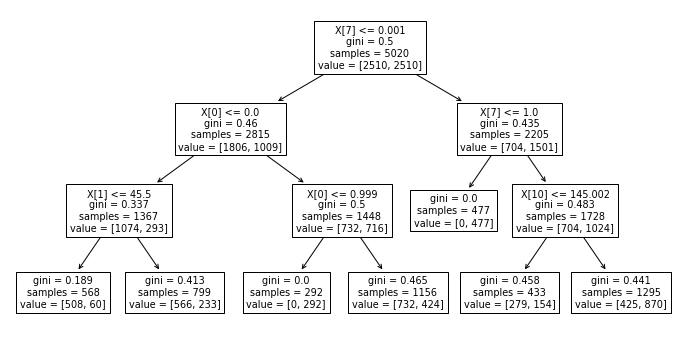

In [25]:
plt.figure(figsize=(12,6))
plot_tree(model_dt)
plt.show()

# Prediction

In [26]:
y_pred=model_dt.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

## Model Evaluation

## i) Classification Report 

In [27]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1020
           1       0.37      0.28      0.32       252

    accuracy                           0.76      1272
   macro avg       0.60      0.58      0.59      1272
weighted avg       0.74      0.76      0.75      1272



## ii) Accuracy Score

In [28]:
print(accuracy_score(y_pred,y_test))

0.7641509433962265


## iii) Confusion Matrix

In [29]:
print(confusion_matrix(y_test,y_pred))

[[902 182]
 [118  70]]


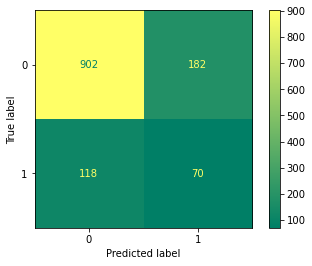

In [30]:
ConfusionMatrixDisplay.from_estimator(model_dt,X_test,y_test,cmap='summer');

## ROC Curve

<Figure size 864x432 with 0 Axes>

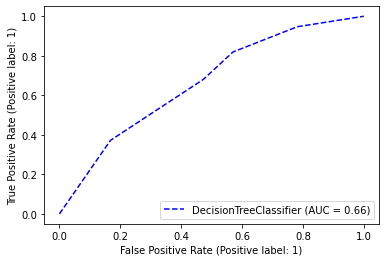

In [31]:
plt.figure(figsize=(12,6))
plot_roc_curve(model_dt,X_test,y_test,color='b',ls="--");